In [56]:
from torch import nn, optim
import matplotlib.pyplot as plt

In [46]:
net = nn.Linear(10, 1)

In [47]:
optim.SGD(
    net.parameters(),
    lr=0.01,
    momentum=0.937,
    weight_decay=1e-4,
)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.937
    nesterov: False
    weight_decay: 0.0001
)

In [48]:
optim.Adam(
    net.parameters(),
    lr=0.001,
    betas=(0.9, 0.999),
    eps=1e-8,
    weight_decay=1e-2,
)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.01
)

In [49]:
optimizer = optim.AdamW(
    net.parameters(),
    lr=0.001,
    betas=(0.9, 0.999),
    eps=1e-8,
    weight_decay=1e-2,
)

In [50]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.001,
   'betas': (0.9, 0.999),
   'eps': 1e-08,
   'weight_decay': 0.01,
   'amsgrad': False,
   'foreach': None,
   'maximize': False,
   'capturable': False,
   'differentiable': False,
   'fused': None,
   'params': [0, 1]}]}

In [51]:
EPOCHS = 100
LR = 0.001

In [52]:
lr_sche = optim.lr_scheduler.CosineAnnealingLR(
    optimizer, T_max=EPOCHS, eta_min=LR * 0.1
)

In [53]:
lr_sche.state_dict()

{'T_max': 100,
 'eta_min': 0.0001,
 'base_lrs': [0.001],
 'last_epoch': 0,
 'verbose': False,
 '_step_count': 1,
 '_get_lr_called_within_step': False,
 '_last_lr': [0.001]}

In [54]:
def get_lr(optimizer):
    return optimizer.state_dict()["param_groups"][0]["lr"]

In [55]:
lrs = []
for _ in range(EPOCHS):
    print("lr =", optimizer.state_dict()["param_groups"][0]["lr"])
    optimizer.zero_grad()
    ...
    optimizer.step()
    lrs.append(get_lr(optimizer))
    lr_sche.step()

lr = 0.001
lr = 0.0009997779521645793
lr = 0.0009991120277927223
lr = 0.000998002884071386
lr = 0.000996451615591515
lr = 0.000994459753267812
lr = 0.0009920292628279098
lr = 0.000989162542872436
lr = 0.0009858624225078836
lr = 0.000982132158554624
lr = 0.0009779754323328187
lr = 0.0009733963460294011
lr = 0.0009683994186497127
lr = 0.000962989581557791
lr = 0.0009571721736097084
lr = 0.0009509529358847651
lr = 0.0009443380060197382
lr = 0.0009373339121517743
lr = 0.0009299475664759064
lr = 0.0009221862584235525
lr = 0.000914057647468726
lr = 0.0009055697555690603
lr = 0.0008967309592491047
lr = 0.0008875499813337064
lr = 0.0008780358823396348
lr = 0.000868198051533946
lr = 0.0008580461976679096
lr = 0.000847590339395643
lr = 0.0008368407953869101
lr = 0.0008258081741438392
lr = 0.0008145033635316127
lr = 0.0008029375200334586
lr = 0.0007911220577405481
lr = 0.0007790686370876667
lr = 0.0007667891533457716
lr = 0.0007542957248827957
lr = 0.0007416006812042824
lr = 0.0007287165507856509

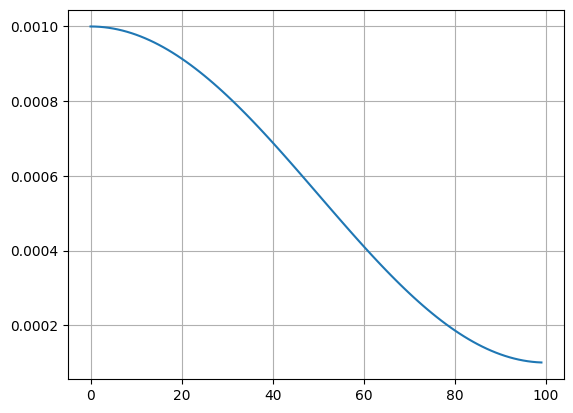

In [58]:
plt.plot(lrs)
plt.grid(True)